## Лабораторна робота 2. Корреляційний аналіз. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
data = pd.read_csv("states.csv")

In [4]:
data.head(10)

,State,MetroRemote,HighSchoolGraduation,Poverty,FemaleHousing
0,Alabama,55.4,79.9,14.6,14.2
1,Alaska,65.6,90.6,8.3,10.8
2,Arizona,88.2,83.8,13.3,11.1
3,Arkansas,52.5,80.9,18.0,12.1
4,California,94.4,81.1,12.8,12.6
5,Colorado,84.5,88.7,9.4,9.6
6,Connecticut,87.7,87.5,7.8,12.1
7,Delaware,80.1,88.7,8.1,13.1
8,District of Columbia,100.0,86.0,16.8,18.9
9,Florida,89.3,84.7,12.1,12.0


1. Для кількох наборів даних з одного датасету зобразити матричну діаграму
розсіювання.

In [5]:
# Оберемо колонки, для яких будуватимемо кореляції
dataCorr = data[['MetroRemote', 'HighSchoolGraduation', 'Poverty', 'FemaleHousing']]

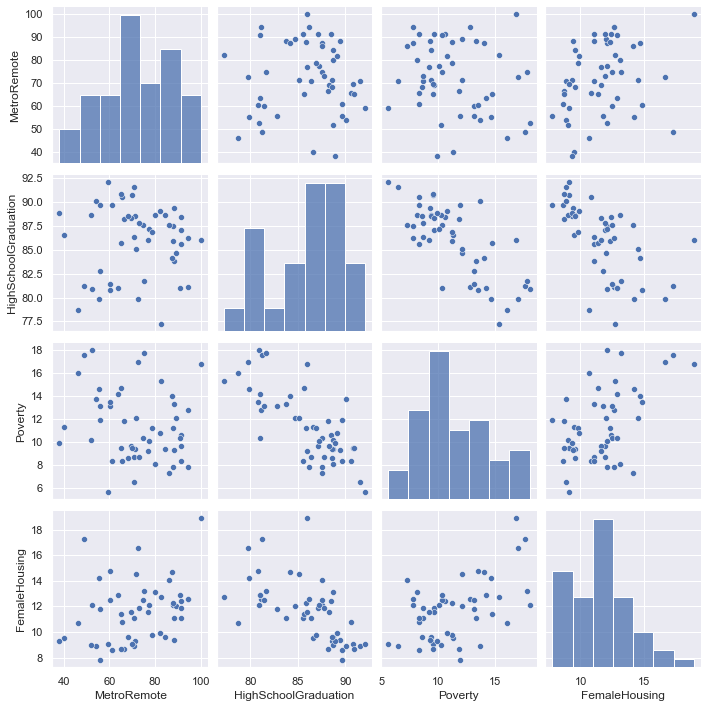

In [8]:
sns.set_theme(palette="deep")
sns.pairplot(dataCorr)

2. Для них же вивести кореляційну матрицю (карту кореляцій).

In [6]:
corrMatrix = dataCorr.corr()

<AxesSubplot:>

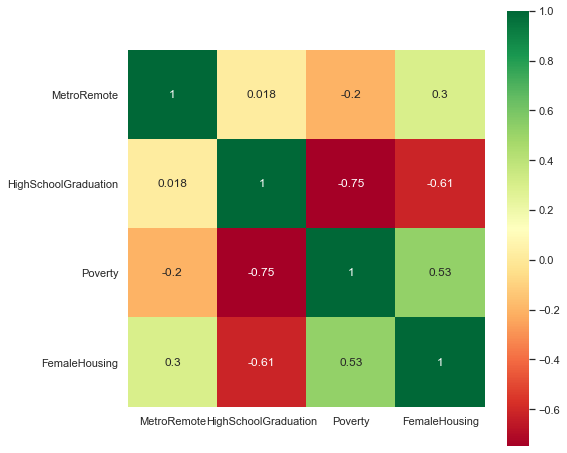

In [7]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrMatrix, annot = True, square=True, cmap='RdYlGn')

3. Для найбільш суттєвих кореляцій порахувати коефіцієнти кореляції Пірсона,
Спірмена або Кендала, статистично перевірити їх на значущість.

Розрахуємо коефіцієнт Пірсона для колонок Poverty та HighSchoolGraduation, щоб перевірити зв’язок між рівнем вищої освіти та рівнем бідності населення.
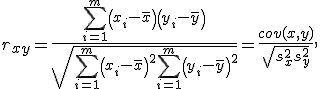

In [13]:
r = st.pearsonr(dataCorr['Poverty'], dataCorr['HighSchoolGraduation'])[0]
print("КК Пірсона: ", r)

КК Пірсона:  -0.7468582531582508


Для перевірки гіпотези викорисатємо Т-розподіл Стьюдента та рівень значущості alpha > 0.05.
Нульва гіпотеза стверджує, що кк дорівнює нулю, альтернативна - не дорівнює нулю:



Вибірковий розподіл цієї статитстики це розподіл Стьюдента з n-2 ступенями свободи.
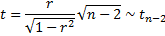
При заданому рівні значущості α > 0.05 за таблицею визначимо критичне значення tкр = 1.676

In [20]:
n = len(dataCorr['Poverty'])
t_max = 1.676
t = round((r * (n - 2)**1/2) / ((1 - r**2)**1/2), 3)
print("t-критичне ", t_max)
print("t ", t)

t-критичне  1.676
t  -82.759


Приймаємо рішення про відхилення чи приняття нульової гіптотези:<br>
відхиляємо Н0: 
не відхиляємо Н0: 

Очевидно, що |-82.759| > 1.676. <br>Отже відхиляємо нульву гіпотезу, отже коефіцієнт кореляції Пірсона у данному випадку є статистично значущим.